In [1]:
!pip install opendatasets -q

In [7]:
import opendatasets as od
od.download("https://www.kaggle.com/agewerc/corporate-credit-rating")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alizrz
Your Kaggle Key: ········


100%|██████████| 299k/299k [00:00<00:00, 6.14MB/s]

In [57]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from random import sample
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold ,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [29]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [10]:
Dataset=pd.read_csv("corporate-credit-rating\corporate_rating.csv")

In [11]:
Dataset.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [12]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

In [14]:
Dataset.shape

(2029, 31)

In [16]:
Dataset['Date'] = pd.to_datetime(Dataset['Date'])
Dataset['Year'] = Dataset['Date'].dt.year

In [18]:
Dataset.isnull().sum()

Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPerShare                          0


In [19]:
Dataset.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Year
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718,2014.042385
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588,1.522409
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,2005.000000
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912,2013.000000
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722,2014.000000
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892,2015.000000
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,2016.000000


In [31]:
Dataset["Rating"].value_counts()

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64

<AxesSubplot:title={'center':'Count of Rating by Type'}>

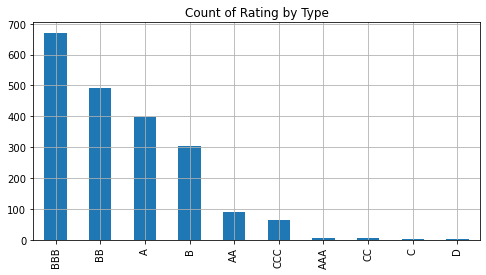

In [43]:
Dataset['Rating'].value_counts().plot(kind='bar',
                                             figsize=(8,4),
                                             title="Count of Rating by Type",
                                             grid=True)

<AxesSubplot:xlabel='Rating', ylabel='freeCashFlowPerShare'>

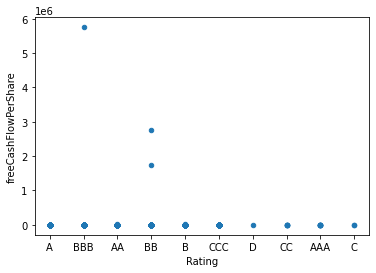

In [22]:
Dataset.plot(kind="scatter", x="Rating", y="freeCashFlowPerShare")

In [26]:
Max_index=Dataset[Dataset["daysOfSalesOutstanding"]==Dataset["daysOfSalesOutstanding"].max()].index

In [34]:
Dataset_final=Dataset.drop(["Name","Symbol","Date"], axis=1)

In [ ]:
# Drawing Boxplots

figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20,44))

i = 0 
j = 0

for c in Dataset_final.columns[6:30]:
    
    sns.boxplot(x=Dataset_final.Rating, y=Dataset_final[c], palette="Set3", ax=axes[i, j])
    
    if j == 2:
        j=0
        i+=1
    else:
        j+=1   

In [42]:
X=Dataset_final.drop("Rating", axis=1)
y=Dataset_final["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f' Training {X_train.shape}, Testing {X_test.shape} ')

 Training (1623, 28), Testing (406, 28) 


In [46]:
Dataset_final.columns

Index(['Rating', 'Rating Agency Name', 'Sector', 'currentRatio', 'quickRatio',
       'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin',
       'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin',
       'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity',
       'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio',
       'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio',
       'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier',
       'ebitPerRevenue', 'enterpriseValueMultiple',
       'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio',
       'payablesTurnover', 'Year'],
      dtype='object')

In [47]:
num_attr=['currentRatio', 'quickRatio',
       'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin',
       'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin',
       'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity',
       'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio',
       'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio',
       'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier',
       'ebitPerRevenue', 'enterpriseValueMultiple',
       'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio',
       'payablesTurnover']

cat_attr=['Rating Agency Name', 'Sector','Year']

In [49]:
full_pipe=ColumnTransformer([
    ('num', StandardScaler(), num_attr),
    ('cat', OneHotEncoder(sparse=False, categories='auto'), cat_attr)],
        remainder='passthrough'
)

X_train_prepared=full_pipe.fit_transform(X_train)

In [50]:
pd.DataFrame(X_train_prepared).head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-0.031483,-0.039094,-0.125981,-0.056074,-0.032077,-0.043400,-0.126706,-0.044158,0.026440,0.025998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.002199,0.048480,0.423362,-0.062357,-0.004186,-0.018849,-0.004204,-0.028059,0.026649,0.026180,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.053438,-0.061954,-0.137045,-0.063257,-0.036491,-0.038913,0.906410,-0.044885,0.026437,0.026115,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.049886,-0.053419,-0.090425,-0.061182,-0.024828,-0.028935,-0.196298,-0.035643,0.026481,0.026103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.020376,-0.030263,-0.012674,-0.064376,-0.037661,-0.041278,-0.548926,-0.046375,0.026403,0.026021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
ada_clf=AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5
)

In [55]:
models = {
    'NB' : GaussianNB(),
    'xgboost' : XGBClassifier(),
    'AdaBoost' : ada_clf,
    'gradient boosting' : GradientBoostingClassifier(),
    'Logistic regression' : LogisticRegression(),
    'random forest' : RandomForestClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'SVM': LinearSVC(),
    'knn' : KNeighborsClassifier(n_neighbors = 4)
}

In [58]:
results = {}
for name, model in models.items():
    model.fit(X_train_prepared, y_train)
    scores = cross_val_score(model, X_train_prepared, y_train, scoring = 'accuracy', cv=5)
    results[name] = round(np.mean(scores),3)

    print(f'{name} trained')
    print("Data shows that the mean is %0.2f and the standard deviation is %0.2f" % (scores.mean(), scores.std()))

C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Setar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


NB trained
Data shows that the mean is 0.08 and the standard deviation is 0.01
[11:51:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Setar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Setar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Setar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Setar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Setar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost trained
Data shows that the mean is 0.55 and the standard deviation is 0.02


C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


AdaBoost trained
Data shows that the mean is 0.34 and the standard deviation is 0.03


C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


gradient boosting trained
Data shows that the mean is 0.51 and the standard deviation is 0.01


C:\Users\Setar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Setar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

Logistic regression trained
Data shows that the mean is 0.42 and the standard deviation is 0.02


C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


random forest trained
Data shows that the mean is 0.56 and the standard deviation is 0.03
Decision Tree trained
Data shows that the mean is 0.42 and the standard deviation is 0.02


C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Setar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Setar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Setar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear

SVM trained
Data shows that the mean is 0.40 and the standard deviation is 0.02
knn trained
Data shows that the mean is 0.39 and the standard deviation is 0.03


C:\Users\Setar\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [59]:
results

{'NB': 0.081,
 'xgboost': 0.553,
 'AdaBoost': 0.341,
 'gradient boosting': 0.514,
 'Logistic regression': 0.419,
 'random forest': 0.559,
 'Decision Tree': 0.421,
 'SVM': 0.404,
 'knn': 0.386}

In [60]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'Accuracy'}).sort_values('Accuracy', ascending=False)
results_df

,Accuracy
random forest,0.559
xgboost,0.553
gradient boosting,0.514
Decision Tree,0.421
Logistic regression,0.419
SVM,0.404
knn,0.386
AdaBoost,0.341
NB,0.081


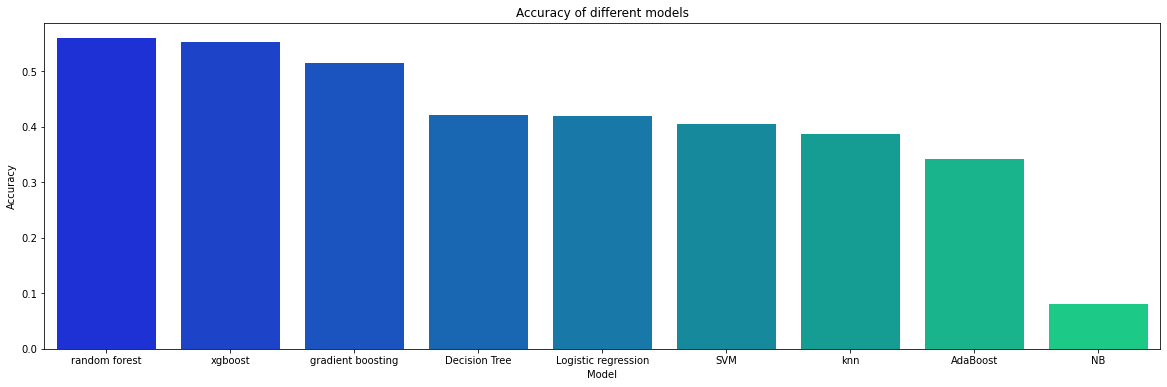

In [61]:
plt.figure(figsize = (20, 6))
sns.barplot(x= results_df.index, y = results_df['Accuracy'], palette = 'winter')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models');

In [62]:
RSME_Test={}

for name , model in models.items():
    Res=accuracy_score(y_test, model.predict(full_pipe.transform(X_test)))
    RSME_Test[name]=round(Res,3)

In [63]:
RSME_Test

{'NB': 0.096,
 'xgboost': 0.576,
 'AdaBoost': 0.325,
 'gradient boosting': 0.534,
 'Logistic regression': 0.387,
 'random forest': 0.547,
 'Decision Tree': 0.372,
 'SVM': 0.389,
 'knn': 0.36}

In [66]:
test_df = pd.DataFrame(RSME_Test, index=range(0,1)).T.rename(columns={0: 'Accuracy'}).sort_values('Accuracy', ascending=False)
test_df

,Accuracy
xgboost,0.576
random forest,0.547
gradient boosting,0.534
SVM,0.389
Logistic regression,0.387
Decision Tree,0.372
knn,0.360
AdaBoost,0.325
NB,0.096


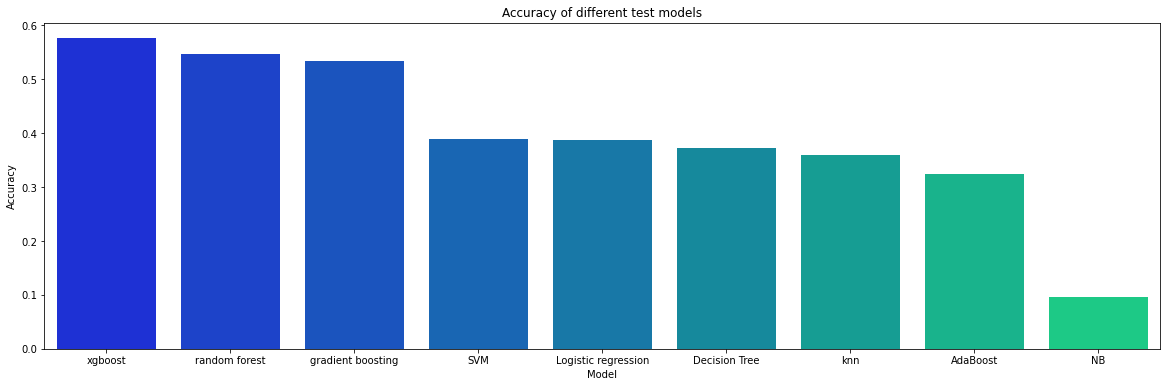

In [65]:
plt.figure(figsize = (20, 6))
sns.barplot(x= test_df.index, y = test_df['Accuracy'], palette = 'winter')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different test models');

In [71]:
from sklearn.model_selection import GridSearchCV
forest_clf = RandomForestClassifier()

param_grid = [
 {'n_estimators': [ 10, 30, 40, 50, 70], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5)
grid_search.fit(X_train_prepared, y_train)

C:\Users\Setar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [10, 30, 40, 50, 70]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}])

In [72]:
grid_search.best_estimator_

RandomForestClassifier(max_features=6, n_estimators=30)

In [79]:
forest_clf_opt= RandomForestClassifier()
forest_clf_opt.fit(X_train_prepared, y_train)
for name, score in zip(list(X_train), forest_clf_opt.feature_importances_):
    print(name, round(score,2))

Rating Agency Name 0.03
Sector 0.04
currentRatio 0.04
quickRatio 0.03
cashRatio 0.04
daysOfSalesOutstanding 0.04
netProfitMargin 0.03
pretaxProfitMargin 0.03
grossProfitMargin 0.04
operatingProfitMargin 0.05
returnOnAssets 0.04
returnOnCapitalEmployed 0.03
returnOnEquity 0.03
assetTurnover 0.03
fixedAssetTurnover 0.04
debtEquityRatio 0.03
debtRatio 0.03
effectiveTaxRate 0.03
freeCashFlowOperatingCashFlowRatio 0.04
freeCashFlowPerShare 0.04
cashPerShare 0.04
companyEquityMultiplier 0.03
ebitPerRevenue 0.05
enterpriseValueMultiple 0.04
operatingCashFlowPerShare 0.03
operatingCashFlowSalesRatio 0.0
payablesTurnover 0.01
Year 0.0


In [ ]:
y_pred = forest_clf_opt.predict(full_pipe.transform(X_test))
accuracy_score(y_test, y_pred)

In [76]:
confusion_matrix(y_test, y_pred)

array([[44,  0,  0,  0,  6, 22,  0,  0,  0],
       [ 8,  5,  0,  1,  1,  5,  0,  0,  0],
       [ 1,  1,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 19, 17, 22,  0,  1,  0],
       [ 3,  0,  0, 10, 48, 39,  0,  0,  0],
       [14,  0,  0,  2, 21, 98,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  3,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)